In [35]:
import pandas as pd
import numpy as np

In [43]:
df = pd.read_stata( r"../_data/dime.dta" )
df

,ID_05,ID_06,ID_10,ID_10_CONFIRM,ID_10_CORRECTED,INC_01,INC_02,INC_03,INC_04,INC_06,...,CRP08QA_C1_P1,CRP08QA_C1_P2,CRP08UA_C1_P1,CRP08UA_C1_P2,CRP09QA_C1_P1,CRP09QA_C1_P2,CRP09UA_C1_P1,CRP09UA_C1_P2,CRP10A_C1_P1,CRP10A_C1_P2
0,3543,Bitega (Murehe),Rwamagana-35,Yes,NaN,0,0,0,0,0,...,10.0,50.0,kg,kg,0.0,0.0,NaN,NaN,NaN,NaN
1,2098,Nyamugari,Rwamagana-33,Yes,NaN,5000,0,0,0,0,...,100.0,60.0,kg,kg,40.0,0.0,kg,NaN,6000.0,NaN
2,3360,Kamakuka,Rwamagana-35,Yes,NaN,0,0,0,0,0,...,70.0,30.0,kg,kg,0.0,0.0,NaN,NaN,NaN,NaN
3,4289,Samatare,Rwamagana-34,Yes,NaN,0,0,12000,80000,0,...,150.0,50.0,kg,kg,0.0,0.0,NaN,NaN,NaN,NaN
4,3340,Ndinda,Rwamagana-35,Yes,NaN,25000,0,0,0,0,...,250.0,80.0,kg,kg,100.0,0.0,kg,NaN,17000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4169,Rugenge,Rwamagana-34,Yes,NaN,0,0,0,20000,0,...,100.0,0.0,kg,NaN,100.0,NaN,kg,NaN,20000.0,NaN
996,1110,Gashake(Nawe),Rwamagana-2,Yes,NaN,50000,0,0,0,0,...,22.5,30.0,kg,kg,0.0,0.0,NaN,NaN,NaN,NaN
997,2085,Akinteko(Rweri),Rwamagana-33,Yes,NaN,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,4266,Rwarugaju,Rwamagana-34,Yes,NaN,210000,50000,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# We know that our ID is not unique
df.ID_05.is_unique

False

In [47]:
# Drop all duplicates
df2 = df.drop_duplicates().copy()

In [49]:
# We see these duplicates are different in a lot of variables
print(df2[df2.ID_05.duplicated( keep = False )])

     ID_05      ID_06         ID_10 ID_10_CONFIRM ID_10_CORRECTED  INC_01  \
314   3730    Mubumwe  Rwamagana-35           Yes             NaN       0   
829   3730  Nyakabuye  Rwamagana-35           Yes             NaN   80000   

     INC_02  INC_03  INC_04  INC_06  ...  CRP08QA_C1_P1  CRP08QA_C1_P2  \
314       0       0       0       0  ...           80.0            NaN   
829       0       0       0   50000  ...           50.0           80.0   

     CRP08UA_C1_P1 CRP08UA_C1_P2 CRP09QA_C1_P1  CRP09QA_C1_P2  CRP09UA_C1_P1  \
314             kg           NaN           0.0            NaN            NaN   
829             kg            kg           0.0           50.0            NaN   

     CRP09UA_C1_P2  CRP10A_C1_P1 CRP10A_C1_P2  
314            NaN           NaN          NaN  
829             kg           NaN      10000.0  

[2 rows x 35 columns]


In [50]:
# Change ID for some rows
df2.loc[314, 'ID_05'] = 3730 * 2

In [51]:
# Now we do not have problems
df2[df2.ID_05.duplicated( keep = False )]


,ID_05,ID_06,ID_10,ID_10_CONFIRM,ID_10_CORRECTED,INC_01,INC_02,INC_03,INC_04,INC_06,...,CRP08QA_C1_P1,CRP08QA_C1_P2,CRP08UA_C1_P1,CRP08UA_C1_P2,CRP09QA_C1_P1,CRP09QA_C1_P2,CRP09UA_C1_P1,CRP09UA_C1_P2,CRP10A_C1_P1,CRP10A_C1_P2


In [52]:
df2.ID_05.is_unique

True

Table 1 - Income: descriptive statistics (DS) table showing each income source and total income.

In [61]:
inc_cols = df2.filter(regex=("INC_*")).columns
inc_cols

Index(['INC_01', 'INC_02', 'INC_03', 'INC_04', 'INC_06', 'INC_10', 'INC_11',
       'INC_12'],
      dtype='object')

In [62]:
for col in inc_cols:
    df2[f'{col}'] = df2[f'{col}'].replace( -88, np.nan )
    df2[f'{col}'] = df2[f'{col}'].replace( -66, np.nan )

In [67]:
table1 = df2.filter(regex=("INC_*")).describe().transpose().round(2)
table1

,count,mean,std,min,25%,50%,75%,max
INC_01,997.0,41648177.94,1.253355e+08,-1.794967e+09,0.0,0.0,40000000.0,900000000.0
INC_02,995.0,57065.29,3.957547e+05,0.000000e+00,0.0,0.0,25000.0,11200000.0
INC_03,996.0,2277.27,2.036726e+04,0.000000e+00,0.0,0.0,0.0,500000.0
INC_04,996.0,26644.59,2.501477e+05,0.000000e+00,0.0,0.0,0.0,6000000.0
INC_06,996.0,4777.01,3.094029e+04,0.000000e+00,0.0,0.0,0.0,600000.0
INC_10,997.0,389.17,9.832380e+03,0.000000e+00,0.0,0.0,0.0,300000.0
INC_11,992.0,65858.86,3.988964e+05,0.000000e+00,0.0,5000.0,50000.0,11200000.0
INC_12,995.0,47717.10,9.079639e+04,0.000000e+00,0.0,0.0,60000.0,1053000.0


Table 2 - Agricultural production: For the three most commonly cultivated crops, display descriptive statistics for total quantity harvested, total quantity sold, and sales value

In [71]:
# Change Nulls with zeros when hh do not cultivate
for val in range(1,3):
    filter1 = df2[f'plant_crop_plot{val}'] == 0
    df2.loc[ filter1 , f'CRP10A_C1_P{val}'] = 0
    df2.loc[ filter1 , f'CRP08QA_C1_P{val}'] = 0
    df2.loc[ filter1 , f'CRP09QA_C1_P{val}'] = 0
    df2.loc[ filter1 , f'cultivated_unit_P{val}'] = 0
    df2.loc[ filter1 , f'sold_unit_P{val}'] = 0

In [14]:
# Cultivated Kg
df2['cultivated_kg_P1'] = df2['CRP08QA_C1_P1'] * df2['cultivated_unit_P1']
df2['cultivated_kg_P2'] = df2['CRP08QA_C1_P2'] * df2['cultivated_unit_P2']
df2['total_cultivated_kg'] = df2['cultivated_kg_P1']  + df2['cultivated_kg_P2']

# No sales, no money
filter1 = df2.CRP09QA_C1_P1 ==0
df2.loc[filter1 , 'CRP10A_C1_P1'] = 0
df2.loc[filter1 , 'sold_unit_P1'] = 0

# No sales, no money
filter1 = df2.CRP09QA_C1_P2 ==0
df2.loc[filter1 , 'CRP10A_C1_P2'] = 0
df2.loc[filter1 , 'sold_unit_P2'] = 0

# Sold Kg
df2['sold_kg_P1'] = df2['CRP09QA_C1_P1'] * df2['sold_unit_P1']
df2['sold_kg_P2'] = df2['CRP09QA_C1_P2'] * df2['sold_unit_P2']
df2['total_sold_kg'] = df2['sold_kg_P1']  + df2['sold_kg_P2']



# Sales
df2['total_earnings_sell'] = df2.filter(regex=("CRP10A*")).sum(axis = 1,  skipna = False )

Most Commonly cultivated crops: We define this metrics as the number of households that cultivate this crop.

We want to count how many houswholds cultivate an specific crop

In [73]:
# N Households cultivate idcrop in Plot 1
df_aux_p1 = df2.groupby('A_CROP_C1_P1' , as_index = False).ID_05.count() \
                .rename(columns = {'A_CROP_C1_P1' : 'crop', 'ID_05' : 'N_Households_1'} )
# N Households cultivate idcrop in Plot 2
df_aux_p2 = df2.groupby('A_CROP_C1_P2' , as_index = False).ID_05.count() \
                .rename(columns = {'A_CROP_C1_P2' : 'crop', 'ID_05' : 'N_Households_2'} )

# Total households taking into account all crops
dft = df_aux_p1.merge(df_aux_p2, on = 'crop', how = 'outer')

# Get total
dft['Total_Households'] = dft.filter(regex=("N_*")).sum( axis = 1 )

# Drop values
df_crop_hh = dft.drop(['N_Households_2', 'N_Households_1'], axis = 1).copy()

# Get the three most cultivated crops
print(df_crop_hh.sort_values('Total_Households', ascending=False).head(3))

crop_top3 = df_crop_hh.sort_values('Total_Households', ascending=False).head(3).crop.tolist()

         crop  Total_Households
5   Dry Beans             895.0
1     Sorghum             195.0
14      Maize              80.0


In [74]:
df2_P1 = df2[['ID_05', 'A_CROP_C1_P1','cultivated_kg_P1', 'sold_kg_P1', 'CRP10A_C1_P1']].copy()
df2_P1.columns = ['id', 'crop', 'cultivated_kg', 'sold_kg', 'sold_value' ]
df2_P1['p'] = 1

KeyError: "['cultivated_kg_P1', 'sold_kg_P1'] not in index"

In [ ]:
df2_P2 = df2[['ID_05', 'A_CROP_C1_P2','cultivated_kg_P2', 'sold_kg_P2', 'CRP10A_C1_P2']].copy()
df2_P2.columns = ['id', 'crop', 'cultivated_kg', 'sold_kg', 'sold_value' ]
df2_P2['p'] = 2

In [75]:
df_tb2 = pd.concat([df2_P1, df2_P2], axis = 0 )

In [76]:
filter_crop = df_tb2.crop.isin( crop_top3 )

In [77]:
df_tb2[filter_crop].drop(['p', 'id'], axis =1 ) \
        .groupby(['crop']).describe().stack().round(2)
    

cultivated_kg    sold_kg  sold_value
crop                                                 
Dry Beans count         892.00     851.00      851.00
          mean        67187.65     741.35     5330.69
          std       1508171.93    2324.65    16707.13
          min        -44400.00       0.00        0.00
          25%           637.50       0.00        0.00
          50%          1800.00       0.00        0.00
          75%          4000.00       0.00        0.00
          max      42750000.00   30000.00   185000.00
Maize     count          80.00      70.00       72.00
          mean         5516.19    3277.29    19092.36
          std         11579.94    5605.10    38103.11
          min        -44400.00       0.00        0.00
          25%           250.00       0.00        0.00
          50%          2500.00     425.00     6750.00
          75%          7500.00    4750.00    20000.00
          max         55000.00   30000.00   200000.00
Sorghum   count         194.00     178.00      179.00
          mean       743565.72    7826.85    31498.27
          std       7776154.76   22069.16    62967.23
          min        -44400.00       0.00        0.00
          25%          1562.50       1.25       25.50
          50%          5000.00    3000.00    15000.00
          75%         12375.00   10000.00    40000.00
          max      99750000.00  277000.00   700000.00

A graph representing the data on flour consumption (the exact nature of the graph is at your discretion).

In [78]:
import seaborn as sns

In [79]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Consumption of floor in Households')

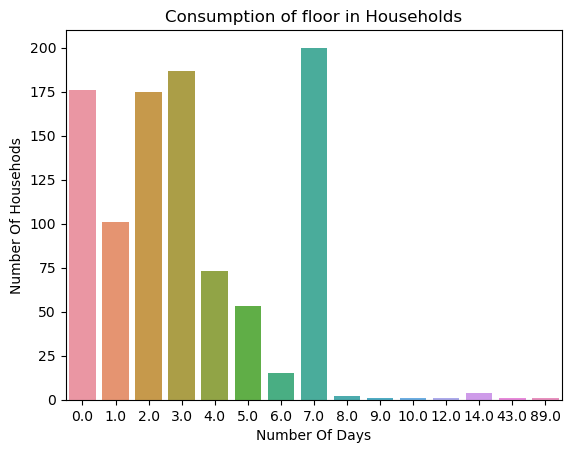

In [80]:
sns.countplot(x=df["EXP_25_1"])
plt.xlabel( 'Number Of Days')
plt.ylabel( 'Number Of Househods')
plt.title( 'Consumption of floor in Households')